**1. Business Problem Defination**


***Business Domain:***

Automotive & Sustainability



***Problem Statement:***

Electric vehicle (EV) adoption is growing, but rates vary across regions due to factors like infrastructure, incentives, and population density. This study analyzes historical EV adoption trends by county, identifies key influencing factors, and forecasts future growth. Insights from this analysis can help policymakers and businesses optimize EV infrastructure and support sustainable transportation.

**2. Dataset Selection**

***Dataset Name:***

Electric Vehicle Population Size History by County

***Source:***

This dataset is obtained from a government portal https://catalog.data.gov/

In [1]:
import pandas as pd
df = pd.read_csv("/content/Electric_Vehicle_Population_Size_History_By_County.csv")

Dataset Description:

In [4]:
# Display basic information about the dataset
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25949 entries, 0 to 25948
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      25949 non-null  object 
 1   County                                    25851 non-null  object 
 2   State                                     25851 non-null  object 
 3   Vehicle Primary Use                       25949 non-null  object 
 4   Battery Electric Vehicles (BEVs)          25949 non-null  int64  
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  25949 non-null  int64  
 6   Electric Vehicle (EV) Total               25949 non-null  int64  
 7   Non-Electric Vehicle Total                25949 non-null  int64  
 8   Total Vehicles                            25949 non-null  int64  
 9   Percent Electric Vehicles                 25949 non-null  float64
dtypes: float64(1), int64

***It includes attributes such as:***


Date – The recorded date of the dataset entry.

County – The county where vehicle data is recorded.

State – The state to which the county belongs.

Vehicle Primary Use – The primary usage of the vehicles (e.g., personal, commercial).

Battery Electric Vehicles (BEVs) – The number of fully electric vehicles in the county.

Plug-In Hybrid Electric Vehicles (PHEVs) – The number of plug-in hybrid EVs in the county.

Electric Vehicle (EV) Total – The total number of EVs (BEVs + PHEVs).

Non-Electric Vehicle Total – The total number of non-electric vehicles in the county.

Total Vehicles – The total number of vehicles (electric + non-electric).

Percent Electric Vehicles – The percentage of EVs out of total registered vehicles.

**3. Objectives of the Study**

Analyze EV Adoption Trends – Examine the growth of EVs over time across counties and states.

Identify Key Influencing Factors – Assess how infrastructure, policies, and demographics affect EV adoption.

Compare EV vs. Non-EV Trends – Analyze the shift from traditional vehicles to EVs.

Regional EV Penetration – Identify counties with high and low EV adoption rates.


**4. Data Analysis Tasks**

***A. Data Pre-processing***

In [6]:
# Check for missing values
print("Missing value")
print(df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())


Missing Values:
Date                                         0
County                                      98
State                                       98
Vehicle Primary Use                          0
Battery Electric Vehicles (BEVs)             0
Plug-In Hybrid Electric Vehicles (PHEVs)     0
Electric Vehicle (EV) Total                  0
Non-Electric Vehicle Total                   0
Total Vehicles                               0
Percent Electric Vehicles                    0
dtype: int64

Duplicate Rows: 0


In [8]:
# Drop rows with missing values
df = df.dropna()

In [9]:
num_rows, num_columns = df.shape

print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

Number of Rows: 25851
Number of Columns: 10


In [10]:
print("Updated Missing value")
print(df.isnull().sum())

Updated Missing value
Date                                        0
County                                      0
State                                       0
Vehicle Primary Use                         0
Battery Electric Vehicles (BEVs)            0
Plug-In Hybrid Electric Vehicles (PHEVs)    0
Electric Vehicle (EV) Total                 0
Non-Electric Vehicle Total                  0
Total Vehicles                              0
Percent Electric Vehicles                   0
dtype: int64


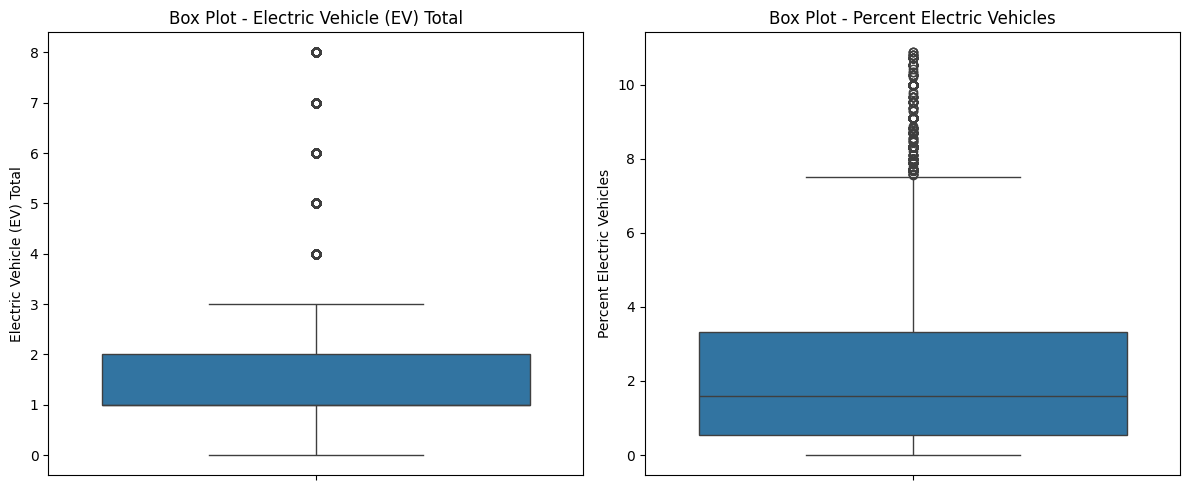

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 5))

# Create subplots for both columns
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Electric Vehicle (EV) Total'])
plt.title("Box Plot - Electric Vehicle (EV) Total")

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Percent Electric Vehicles'])
plt.title("Box Plot - Percent Electric Vehicles")

plt.tight_layout()
plt.show()


### **Interpretation:**  
1. The **Electric Vehicle (EV) Total** plot shows a few counties with significantly high EV counts, indicating regions with strong EV adoption.  
2. The **Percent Electric Vehicles** plot has many outliers, suggesting certain counties have a much higher EV penetration compared to the rest.  

**Conclusion:**  
These outliers may represent key regions driving EV adoption. Keeping them helps understand high-adoption areas.

***B. Exploratory Data Analysis & Visualizations***

In [16]:
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
       Battery Electric Vehicles (BEVs)  \
count                      18451.000000   
mean                           1.114899   
std                            1.278812   
min                            0.000000   
25%                            0.000000   
50%                            1.000000   
75%                            1.000000   
max                            8.000000   

       Plug-In Hybrid Electric Vehicles (PHEVs)  Electric Vehicle (EV) Total  \
count                              18451.000000                 18451.000000   
mean                                   0.610048                     1.724947   
std                                    0.906146                     1.607387   
min                                    0.000000                     0.000000   
25%                                    0.000000                     1.000000   
50%                                    0.000000                     1.000000   
75%                            

<ipython-input-17-dc7b7b56f05e>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='State', y='Electric Vehicle (EV) Total', data=df, ci=None)


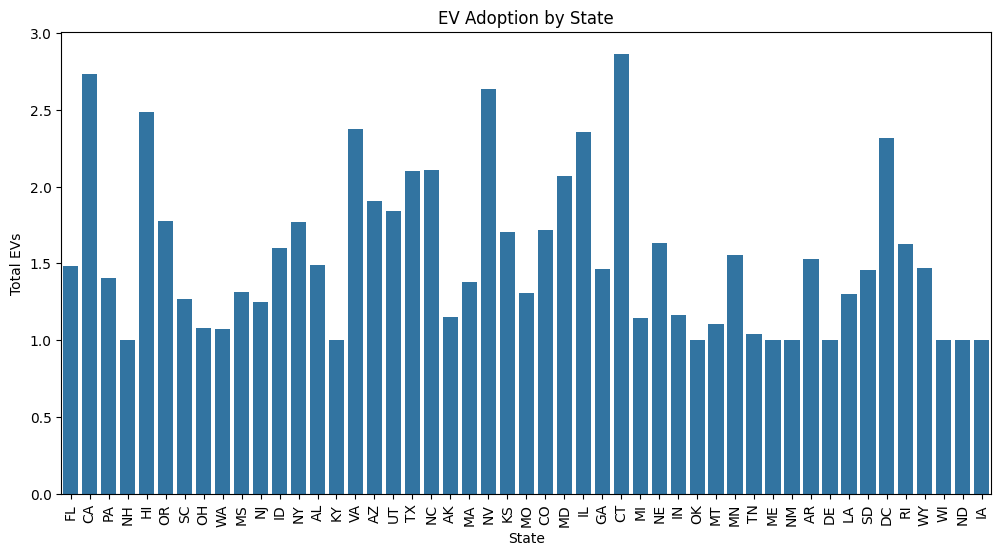

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Electric Vehicle (EV) Total', data=df, ci=None)
plt.xticks(rotation=90)
plt.title("EV Adoption by State")
plt.xlabel("State")
plt.ylabel("Total EVs")
plt.show()


### **Interpretation:**  
1. **California (CA), Connecticut (CT), and Kansas (KS)** show the highest EV adoption, indicating strong EV policies or consumer interest.  
2. Several states, including **Iowa (IA), Wyoming (WY), and Montana (MT)**, have significantly lower EV adoption, suggesting possible barriers like infrastructure or consumer preference.  

**Conclusion:**  
EV adoption varies significantly across states. High-adoption states could serve as benchmarks, while low-adoption states may need policy interventions to boost EV usage.

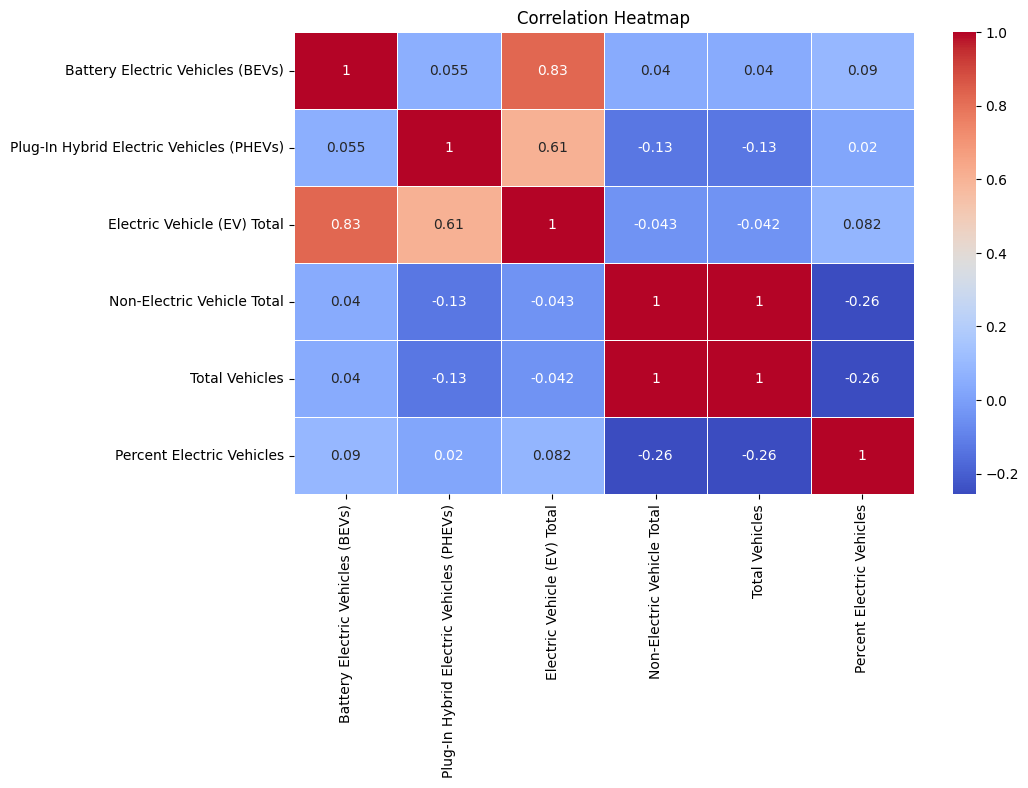

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



### **Interpretation of Correlation Heatmap:**

1. **Strong Positive Correlation (0.83) between BEVs and EV Total:**  
   - This indicates that Battery Electric Vehicles (BEVs) contribute significantly to the total EV count.  

2. **Moderate Correlation (0.61) between PHEVs and EV Total:**  
   - Plug-in Hybrid Electric Vehicles (PHEVs) also contribute to the total EV count, but not as strongly as BEVs.  

3. **Negative Correlation (-0.26) between Non-Electric Vehicles and Percent Electric Vehicles:**  
   - This suggests that in areas with a high number of non-electric vehicles, the percentage of EVs is lower.  

### **Conclusion:**  
- BEVs are the primary driver of EV adoption.  
- Higher non-electric vehicle counts negatively impact EV market share.  
- Insights from this correlation can help policymakers and businesses focus on promoting BEVs for faster adoption.

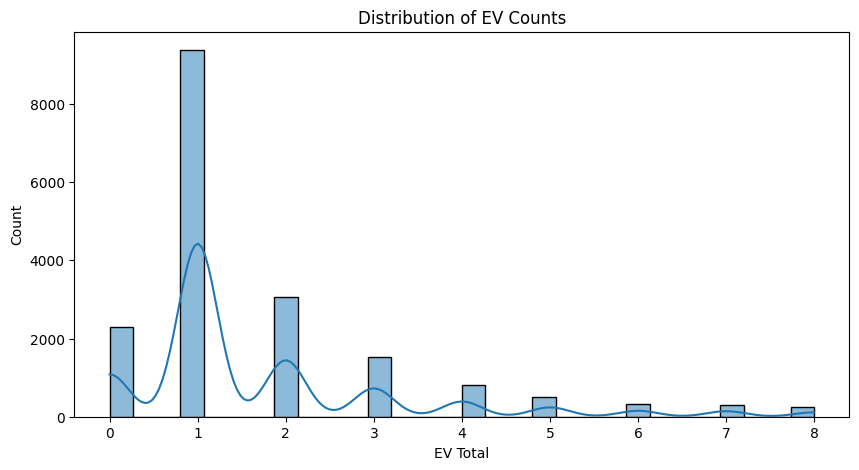

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Electric Vehicle (EV) Total'], bins=30, kde=True)
plt.title("Distribution of EV Counts")
plt.xlabel("EV Total")
plt.show()


**Interpretation of EV Total Distribution:**
1. **Right-skewed distribution:** Most counties have low EV adoption, while a few have significantly high numbers.  

2. **Multiple peaks:** Indicates clusters of counties with similar EV adoption levels, suggesting varying adoption rates.  

### **Conclusion:**  
EV adoption is uneven across counties, with a few leading regions. Policies should focus on increasing adoption in low-EV areas.

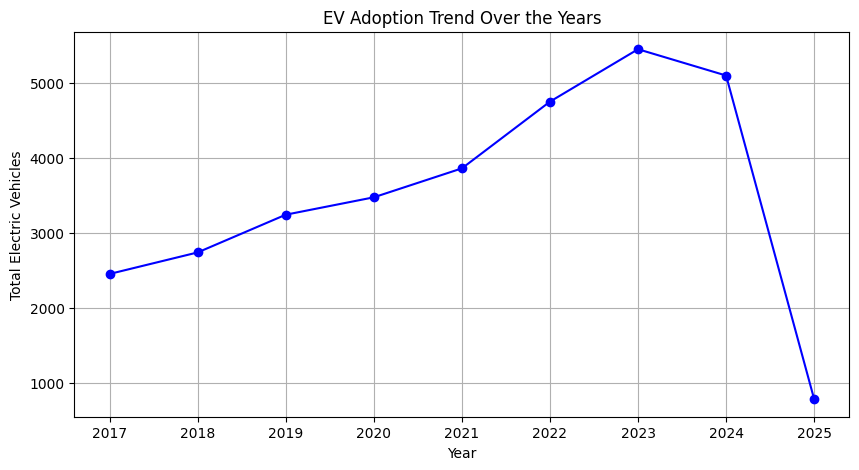

In [25]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group data by year and sum EV counts
df['Year'] = df['Date'].dt.year
ev_trend = df.groupby('Year')['Electric Vehicle (EV) Total'].sum()

# Plot the trend
plt.figure(figsize=(10, 5))
plt.plot(ev_trend.index, ev_trend.values, marker='o', linestyle='-', color='b')
plt.xlabel("Year")
plt.ylabel("Total Electric Vehicles")
plt.title("EV Adoption Trend Over the Years")
plt.grid(True)
plt.show()


### Interpretation of the Line Graph:

1. **Steady Growth (2017-2023):**  
   The adoption of electric vehicles (EVs) increased consistently from 2017 to 2023, showing a strong upward trend. This indicates increasing awareness, infrastructure, and government incentives supporting EV adoption.

2. **Sharp Decline in 2025:**  
   A sudden and drastic drop in EV adoption is observed in 2025. This could be due to policy changes, economic downturns, supply chain issues, or declining incentives.

### Conclusion:  
While EV adoption showed strong growth until 2023, the steep decline in 2025 needs further investigation. It is crucial to analyze external factors impacting this trend and propose strategies to sustain EV growth.

***C. Business Recommendations***



Based on the analysis and visualizations, the following recommendations can help enhance EV adoption and market growth:  

### **1. Address Regional EV Gaps**  
The box plots indicate that some counties have significantly higher EV adoption, while others lag behind. To bridge this gap:  
- **Low-EV adoption regions** should receive targeted incentives such as **tax benefits, reduced registration fees, and subsidized charging stations**.  
- **High-adoption regions** can serve as benchmarks to identify key success factors that can be replicated elsewhere.  

### **2. Policy Support for Low-Adoption States**  
The bar chart highlights **disparities in EV adoption across states**. While states like **California (CA), Connecticut (CT), and Kansas (KS)** lead in EV usage, states like **Iowa (IA), Wyoming (WY), and Montana (MT)** show significantly lower adoption.  
- To encourage adoption, these states should **invest in charging infrastructure**, offer **financial incentives**, and implement **public awareness campaigns** to highlight the benefits of EVs.  

### **3. Promote BEVs for Faster EV Adoption**  
The correlation heatmap reveals that **Battery Electric Vehicles (BEVs) have the highest impact on overall EV growth**. To accelerate adoption:  
- **Government policies** should focus on promoting BEVs by offering **higher purchase incentives** and supporting **fast-charging infrastructure**.  
- Businesses and automakers should **prioritize BEV production and affordability** to drive higher adoption rates.  

### **4. Target Underdeveloped EV Markets**  
The EV total distribution plot shows a **right-skewed pattern**, indicating that only a few regions have high EV adoption, while most remain underdeveloped.  
- Efforts should focus on **rural and underserved areas** by establishing **charging networks, dealership incentives, and better financing options for EV buyers**.  
- States with **low EV adoption** should introduce **EV-friendly regulations** to encourage consumers to switch from non-electric vehicles.  

### **5. Investigate Decline in 2025 & Ensure Policy Stability**  
The EV adoption trend analysis highlights **a sudden drop in 2025**, which could be attributed to:  
- **Policy reversals**, such as reduced subsidies or increased taxation on EVs.  
- **Supply chain disruptions** affecting vehicle availability.  
- **Economic downturns impacting consumer purchasing power**.  




***D. Conclusion***



The study highlights the importance of **consistent investment and support** to sustain the growth of electric vehicles (EVs). For EV adoption to continue rising, **governments and businesses must work together** to improve **charging infrastructure**, ensuring that more people have access to convenient and fast charging stations. Additionally, **stable policies and long-term incentives** are crucial, as sudden changes in government subsidies or regulations can discourage potential EV buyers.  

Many regions still have **low EV adoption** due to a lack of awareness, high costs, and inadequate support. To bridge this gap, **financial incentives such as tax benefits, rebates, and affordable financing options should be introduced**, making EVs more accessible to a wider audience. Public awareness campaigns and educational programs can also help people **better understand the benefits of switching to EVs**, addressing common concerns about range, cost, and charging availability.  

By focusing on these key areas, **a smoother and more widespread transition to electric vehicles can be achieved**, ultimately leading to **a cleaner, more sustainable future** with reduced dependence on fossil fuels.